# ML Clustering - Network Intrusion Detection
## Part 2 - DATA PREPROCESSING

### 1. INITIALIZATION

In [24]:
# Import necessary libraries and modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Set display options
pd.set_option('display.max_columns', None)

### 2. LOADING DATASET

In [3]:
# Initialize required variables to read the cleaned data file
data_file_location = "..\\data\\interim\\"
data_file_name = "kddcup99_cleaned"
data_file_ext = ".csv"

# Read the dataset
data = pd.read_csv(data_file_location + data_file_name + data_file_ext, index_col=0)

### 3. EXPLORING THE DATASET

In [7]:
# Get a general overview of the column types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 976158 entries, 0 to 976157
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     976158 non-null  int64  
 1   protocol_type                976158 non-null  object 
 2   service                      976158 non-null  object 
 3   flag                         976158 non-null  object 
 4   src_bytes                    976158 non-null  int64  
 5   dst_bytes                    976158 non-null  int64  
 6   land                         976158 non-null  int64  
 7   wrong_fragment               976158 non-null  int64  
 8   urgent                       976158 non-null  int64  
 9   hot                          976158 non-null  int64  
 10  num_failed_logins            976158 non-null  int64  
 11  logged_in                    976158 non-null  int64  
 12  num_compromised              976158 non-null  int64  
 13 

From the information provided by info() functions we observe the following:
- The majority of data fields are numerical.
- Only four out of the 41 fields are categorical.
- The dataset is originally labeled, and the attribute "labels" represents the classification of each sample. This attribute won't be used during the analysis but we will rely on it later on as a "ground truth" to evaluate the clustering results.

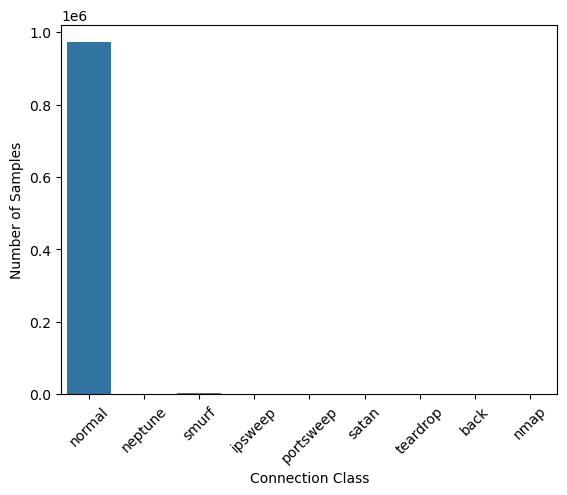

In [16]:
# Check the distribution of classes for all connection samples
count_plot = sns.countplot(data=data, x="labels")
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=45)
plt.xlabel("Connection Class")
plt.ylabel("Number of Samples")
plt.show()

- As the chart clearly shows, the dataset is not equally distributed and the majority of samples are of normal classification. This is quite expected since we are using the "SA" version of the KDD Cup '99 dataset.
- In this version of the dataset, we have 9 different classes being one of them normal and the other 8 are malicious.
- As a primary goal of this anomaly analysis, we try to differentiate in this demo between only two potential types of connections, normal and abnormal. While we keep the further analysis of malicious samples subtypes for a later "more sophisticated" study.

### 4. ENCODING CATEGORICAL FEATURES

In [25]:
# Check the values of categorical features
categorical_features = ["protocol_type", "service", "flag"]
for c in categorical_features:
    print(f"Feature {c} has {data[c].nunique()} unique values.")

Feature protocol_type has 3 unique values.
Feature service has 52 unique values.
Feature flag has 10 unique values.


Since there is no implicit order between the values of categorical attributes, we will use the One-Hot Encoding mechanism to transfer each value into a vector of 1 and 0s, representing the absence/presence of this certain value in its sample.

In [26]:
# Initialize the encoder with its default parameters
ohe = OneHotEncoder()

# Fit the encoder to categorical features in the dataset
encoded_features = ohe.fit_transform(data[categorical_features])

# Create a dataframe of encoded features
encoded_features_df = pd.DataFrame(encoded_features.toarray(), columns=ohe.get_feature_names_out())

# Check the results of encoding
encoded_features_df

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_finger,service_ftp,service_ftp_data,service_gopher,service_http,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_mtp,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_nnsp,service_ntp_u,service_other,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_ssh,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976153,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
976154,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
976155,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
976156,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


As shown in this overview and with referring to the One-Hot Encoding algorithm, the total number of resulting columns is 65, which matches the sum of all distinct values of considered features (3+52+10=65)

In [27]:
# Merge encoded features with the dataset and drop original columns
data = pd.concat([data, encoded_features_df], axis=1).drop(categorical_features, axis=1)

In [29]:
# Check new dataset dimensions
data.shape

(976158, 103)

In [32]:
# Check data fields type
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 976158 entries, 0 to 976157
Columns: 103 entries, duration to flag_SH
dtypes: float64(80), int64(22), object(1)
memory usage: 774.5+ MB


We have only one remaining "object" field, which is basically the class attribute which is going to be ignored during the analysis.

To be performed:
- Normalization
- PCA
- Check best k value
- Apply KMeans
- Compare with original classes